In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mlxtend.plotting import plot_decision_regions # Import a nice function for plotting decision boudaries

sns.set_theme() # Set the Seaborn theme

data = pd.read_csv("Gender Classification.csv") # Read the iris dataset into a pandas DataFrame object

## Data
Taking a look at the dataset

In [3]:
data #showing the dataset  

,long_hair,Forehead Width (cm),Forehead Height (cm),nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,Gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


## Goal: 
We want to classify the genders based on forehead height and width.

In [5]:
y = data.iloc[0:500].Gender.values # assigning y as a numpy array contaning the first 500 gender values 

y #displaying the array

array(['Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male',
       'Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male',
       'Female', 'Fema

Since every value in the gender column are strings, we need to convert them to numerical values.

In [6]:
y = np.where(y == 'Male', -1, 1) # wherever y = "Male", it will become -1, and 1 otherwise 

y #displaying the array of the first 500 rows of the gender column with their new numercical value

array([-1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1,
        1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,
       -1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,
        1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,
       -1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1,
       -1,  1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1,
       -1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,
        1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1,
       -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1,
        1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,
       -1,  1,  1, -1, -1

For the X values, that is, the features, we will be look at the forehead width and height columns 

In [7]:
X = data[["Forehead Width (cm)", "Forehead Height (cm)"]].iloc[:500].values # Storing the desired feature measurements in the matrix X

# X #displaying the array of the first 500 rows of the forehead width and height column

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Model

The Perceptron is a specific instance of the single neuron model with a specific activation function. Moreover, since this model is a generalization of the single neuron model, a Perceptron class will be created for future reference. 

In [11]:
class Perceptron(object):
    def __init__(self, epochs = 50): # method used for intialization of data member(s). In this case, epochs
        self.epochs = epochs
        
    def train(self, X, y):           # training method
        self.weights = np.random.rand(1 + X.shape[1]) 
        
        self.errors_ = []            # list of the misclassifications 
        
        for _ in range(self.epochs): # going through each instance of the epochs

            errors = 0               # counter for the errors during each epoch

            for x_i, target in zip(X, y):                   # pairing the X (feature vector) with cooresponding y (label)
                update = 0.5 * (self.predict(x_i) - target) # this is just 1/2(y_hat - y)
                self.weights[:-1] -= update * x_i           # w = w - 1/2(y_hat - y)x_i 
                self.weights[-1] -= update                  # b = b - 1/2(y_hat - y)
                errors += int(update != 0)                  # if update rule != 0, then count error

            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X): #method for the weighted sum
        return np.dot(X, self.weights[:-1]) + self.weights[-1] # dot product   
    
    def predict(self, X): # predict method
        return np.where(self.net_input(X) >= 0.0, 1, -1) # wherever the weighted sum is >= 0, return 1, otherwise -1

We now need to instantiate the perceptron class, and train it by calling the train method!

In [18]:
percep = Perceptron(epochs = 1000) # Instantiating an instance of the Perceptron class

percep.train(X, y) # Call the train method to train the weights and bias of the given instance

Let's see a visualization of this data and the predicited decision boundry

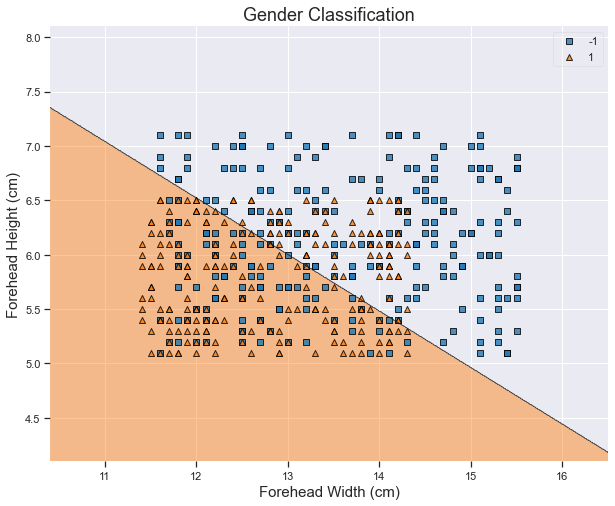

In [19]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = percep)
plt.title("Gender Classification", fontsize = 18)
plt.xlabel("Forehead Width (cm)", fontsize = 15)
plt.ylabel("Forehead Height (cm)", fontsize = 15)
plt.show()

The data points seem too compact to allow a clear classification, or distinction between male or female. However, it is clear that you are a male if your forehead width is greater than or equal to 14.5 cm and forehead height is greater than 6.5 cm. 

Additionally, we can visualize the time it took (iterations) to get the plot above by plotting the errors.

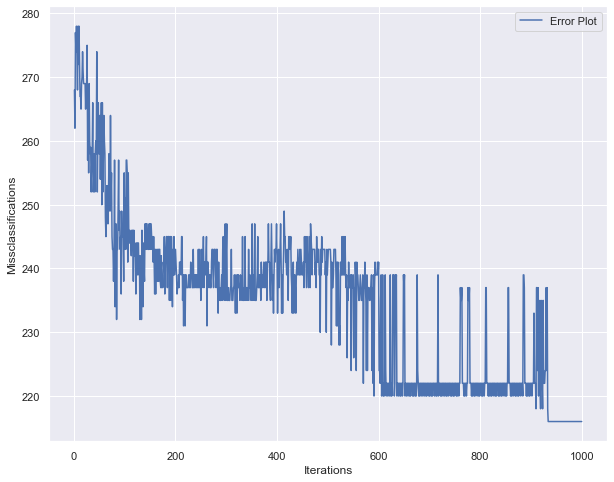

In [20]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         label = "Error Plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

Based on the results above, the Perceptron model does not seem to be a good for this dataset. The data points are too closely-packed, and cannot be seperated by a linear funciton. As shown above, there are too many misclassifications to begin with along with the fact that it took nearly 1000 iterations to only get errors NEAR zero. Perhaps the Linear Regression model would be a more suitable method to use on this dataset. 